In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Game:
    def __init__(self, rules = None):
        self.score = 0
        self.score1 = 0
        self.score2 = 0
        self.strikes = 0
        self.outs = 0
        self.bases = [1,0,0,0]
        self.rules = rules or \
                     {'[1, 1]':2, #Double == 2
                      '[1, 2]':1, #Single == 1
                      '[1, 3]':1,
                      '[1, 4]':1,
                      '[1, 5]':5, #Base on error == 5
                      '[1, 6]':5, #Base on balls == 5
                      '[2, 2]':0, #Strike == 0
                      '[2, 3]':0,
                      '[2, 4]':0,
                      '[2, 5]':0,
                      '[2, 6]':-1, #Foulout == -1 (Basically an out)
                      '[3, 3]':-1, #Out at first == -1
                      '[3, 4]':-1,
                      '[3, 5]':-1,
                      '[3, 6]':-1,
                      '[4, 4]':-0.5, #Flyout == -0.5 (Basically an out, however made it its distinct value between a strike and
                                     #an out because runners score from third on those)
                      '[4, 5]':-1,
                      '[4, 6]':-1,
                      '[5, 5]':-2, #Doubleplay == -2 (Basically 2x out)
                      '[5, 6]':3, #Triple == 3
                      '[6, 6]':4 #Homerun == 4
                     } 
    
    def simulate_game(self, n_innings = 9):
        for i in range(0, n_innings):
            self.simulate_inning()
    
    def simulate_inning(self):
        while self.outs < 2:
            self.bat()
        self.score1 += self.score
        self.switch_sides()
        while self.outs < 2:
            self.bat()
        self.score2 += self.score
        
    def switch_sides(self):
        self.score = 0
        self.strikes = 0
        self.outs = 0
        self.bases = [1,0,0,0]
    
    def decide_outcome(self, rolls):
        return self.rules[str(rolls)]
    
    def bat(self):
        self.bases[0] = 1
        rolls = sorted(np.random.randint(1,7,2))
        result = self.decide_outcome(rolls)
        self.update_game(result)
        
    def update_game(self, result):
        if result == 0:
            self.strikes += 1
            if self.strikes == 3:
                self.strikes = 0
                self.outs += 1
        elif result == -1:
            self.outs += 1
        elif result == -0.5:
            self.outs += 1
            #Scoring on flyouts if runner is on third
            if self.bases[3] == 1:
                self.score += 1
                self.bases[2] = 0
        elif result == -2:
            self.outs += 2
        elif result >= 0 and result <= 4:
            for i in reversed(range(len(self.bases))):
                if self.bases[i] == 1:
                    newindex = i + result
                    self.bases[i] = 0
                    #If we ran through all bases
                    if newindex >= 4:
                        self.score += 1
                    #If we haven't run through all bases
                    else:
                        #We assume people on 2nd base score off singles or better
                        if i == 2:
                            self.score += 1
                        #Otherwise we compute positioning as usual
                        else:
                            self.bases[newindex] = 1
        elif result == 5:
            #Check if the next following bases are occupied and update accordingly
            if self.bases[1] == 1:
                if self.bases[2] == 1:
                    if self.bases[3] == 1:
                        self.score += 1
                    self.bases[3] = 1
                self.bases[2] = 1
            self.bases[1] = 1

In [3]:
finalscores = []
for i in range(0,10000):
    game = Game()
    game.simulate_game()
    finalscores.append(game.score1 + game.score2)

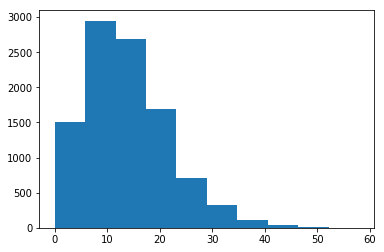

In [4]:
plt.hist(finalscores)
plt.show()

C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


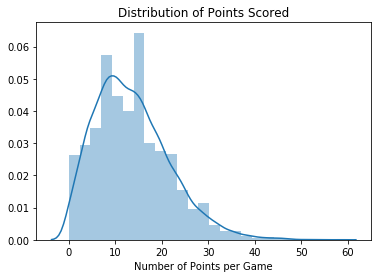

In [5]:
g = sns.distplot(finalscores, bins = 25)
g.set_xlabel("Number of Points per Game")
g.set_title("Distribution of Points Scored")
plt.show()

In [6]:
#Average points per game
np.mean(finalscores)

13.5239

In [7]:
#Median points per game
np.median(finalscores)

12.0

In [8]:
#Using this https://sabr.org/research/matchup-probabilities-major-league-baseball
print(f"Single needs {21*0.15258} dice outcomes")
print(f"Double needs {21*0.04511} dice outcomes")
print(f"Triple needs {21*0.00506} dice outcomes")
print(f"Homerun needs {21*0.02694} dice outcomes")
print(f"Walk needs {21*0.07456} dice outcomes")
print(f"Hit-by-pitch needs {21*0.00816} dice outcomes") #Just add to walk
print(f"Out needs {21*0.68758} dice outcomes")

Single needs 3.20418 dice outcomes
Double needs 0.94731 dice outcomes
Triple needs 0.10626000000000001 dice outcomes
Homerun needs 0.56574 dice outcomes
Walk needs 1.56576 dice outcomes
Hit-by-pitch needs 0.17136 dice outcomes
Out needs 14.439179999999999 dice outcomes


In [9]:
updatedrules =  {'[1, 1]':1, #Single == 1
                 '[1, 2]':1,
                 '[1, 3]':1,
                 '[1, 4]':2, #Double == 2
                 '[1, 5]':4, #Homerun, we'll give it 1 even though its about 0.5, we can make a case for triple being included
                             #in it because a triple is essentially most likely going to result in points scored too
                 '[1, 6]':5, #Walk == 5, we can include hit by pitch too
                 '[2, 2]':5,
                 '[2, 3]':-1, #14  out possibilities
                 '[2, 4]':-1,
                 '[2, 5]':-1,
                 '[2, 6]':-1, 
                 '[3, 3]':-1, 
                 '[3, 4]':-1,
                 '[3, 5]':-1,
                 '[3, 6]':-1,
                 '[4, 4]':-1,
                 '[4, 5]':-1,
                 '[4, 6]':-1,
                 '[5, 5]':-1,
                 '[5, 6]':-1,
                 '[6, 6]':-1
                } 

In [10]:
finalscores = []
for i in range(0,10000):
    game = Game(updatedrules)
    game.simulate_game()
    finalscores.append(game.score1 + game.score2)

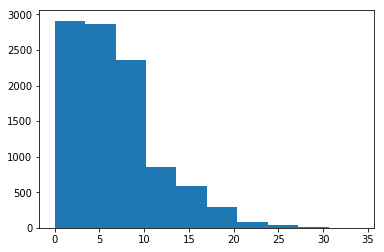

In [11]:
plt.hist(finalscores)
plt.show()

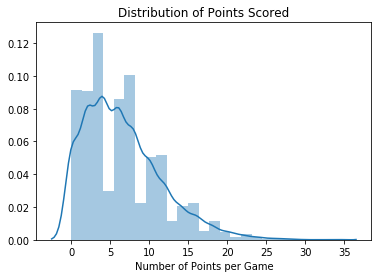

In [12]:
g = sns.distplot(finalscores, bins = 25)
g.set_xlabel("Number of Points per Game")
g.set_title("Distribution of Points Scored")
plt.show()

In [13]:
#Average points per game
np.mean(finalscores)

6.5751

In [14]:
#Median points per game
np.median(finalscores)

6.0

In [15]:
#Much closer to the estimate of 8 points per game found here
#https://www.sportingcharts.com/articles/mlb/what-is-the-average-number-of-runs-scored-in-an-mlb-game.aspx
#The prob data is from 2013, which was a low 8, so we're not too far off.
#I am convinced we would have better results if we either had
#1) More reliable probabilities
#2) Used exact probabilities instead of a dice roll